# **Challenge 2 : Supervised Learning**

Objective : explore the dataset thoroughly, preprocess it properly, and implement the supervised learning methodology seen by addressing three predictive tasks.

- Task 1 : Predict the original genre (genre_top)

- Task 2 : Predict your coarse-grained genre (3 to 4 categories)

- Task 3 : Predict the track duration

## **Phase 1 : Descriptive statistics and feature engineering**

In [64]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import ast
import numpy as np
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.decomposition import PCA


In [65]:
# Loading the data
echonest = pd.read_csv('echonest_features.tsv',sep = "\t")
spectral = pd.read_csv('spectral_features.tsv', sep = "\t")
tracks = pd.read_csv('tracks.tsv', sep = "\t")
genres = pd.read_csv('genres.csv')

In [66]:
print("First lines of echnonest dataset:")
display(echonest.head())
print("First lines of spectral dataset:")
display(spectral.head())
print("First lines of tracks dataset:")
display(tracks.head())
print("First lines of genres dataset:")
display(genres.head())

First lines of echnonest dataset:


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,11870,0.373039,0.429892,0.645929,0.769285,0.195042,0.101240,159.908,0.474554
1,11871,0.908215,0.427918,0.694364,0.950413,0.269082,0.180927,188.077,0.585049
2,11872,0.204111,0.501329,0.608690,0.725811,0.125451,0.623711,137.676,0.522381
3,11873,0.464478,0.419687,0.743163,0.786033,0.214622,0.142762,79.371,0.644394
4,11874,0.921960,0.350383,0.588584,0.861204,0.120561,0.187306,190.518,0.537996


First lines of spectral dataset:


,track_id,spectral_bandwidth_kurtosis_01,spectral_bandwidth_max_01,spectral_bandwidth_mean_01,spectral_bandwidth_median_01,spectral_bandwidth_min_01,spectral_bandwidth_skew_01,spectral_bandwidth_std_01,spectral_centroid_kurtosis_01,spectral_centroid_max_01,...,spectral_centroid_min_01,spectral_centroid_skew_01,spectral_centroid_std_01,spectral_rolloff_kurtosis_01,spectral_rolloff_max_01,spectral_rolloff_mean_01,spectral_rolloff_median_01,spectral_rolloff_min_01,spectral_rolloff_skew_01,spectral_rolloff_std_01
0,11870,1.386746,3632.703369,1373.206787,1240.352661,519.210815,1.255615,467.644409,4.565675,4842.871582,...,327.569489,2.080017,575.112488,2.839292,8968.579102,2338.119629,1981.054688,516.796875,1.812383,1234.268433
1,11871,0.988129,3607.125000,1422.162231,1373.406982,367.892883,0.769592,474.042175,4.594322,5594.874023,...,187.277390,1.886271,655.114319,2.036670,9560.742188,2132.796143,1830.322266,226.098633,1.412759,1387.095459
2,11872,-0.288111,3509.530273,1639.155884,1663.023804,397.353760,0.066965,421.000488,2.911395,5128.212891,...,99.604340,1.492531,645.915894,-0.463741,9345.410156,2760.100342,2583.984375,64.599609,0.245426,1420.888672
3,11873,0.013341,3748.871338,1424.273682,1366.631958,454.320618,0.568272,440.070923,0.983255,5822.322266,...,203.401001,0.916191,615.655090,-0.114326,9722.241211,2445.449219,2271.752930,86.132812,0.581035,1330.056030
4,11874,2.176594,4069.634522,1402.951172,1350.756836,427.842957,1.069853,529.154175,8.858504,6391.264160,...,244.832825,2.521557,755.226440,4.567743,10142.138672,2265.638672,1905.688477,215.332031,1.849876,1474.148682


First lines of tracks dataset:


,track_id,album_title,album_tracks,artist_latitude,artist_longitude,artist_name,duration,favorites,genre_top,genres,genres_all,interest,listens,title
0,11870,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,131,0,Hip-Hop,[21],[21],733,218,What The Truth Should Be
1,11871,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,185,0,Hip-Hop,[21],[21],753,267,It's True
2,11872,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,183,0,Hip-Hop,[21],[21],744,223,Pedestal
3,11873,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,213,3,Hip-Hop,[21],[21],936,245,Timetomoveover (prod. 6th Sense)
4,11874,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,162,0,Hip-Hop,[21],[21],861,192,Stranger feat. 6th Sense


First lines of genres dataset:


,genre_id,genre_color,genre_handle,genre_parent_id,genre_title
0,1,#006666,Avant-Garde,38.0,Avant-Garde
1,2,#CC3300,International,NaN,International
2,3,#000099,Blues,NaN,Blues
3,4,#990099,Jazz,NaN,Jazz
4,5,#8A8A65,Classical,NaN,Classical


In [67]:
print(f"tracks : {tracks.shape}")
print(f"echonest : {echonest.shape}")
print(f"spectral : {spectral.shape}")
print(f"genres : {genres.shape}")

tracks : (99995, 14)
echonest : (11440, 9)
spectral : (99995, 22)
genres : (164, 5)


### Step 1 : Merging the datasets

In [68]:
display((echonest.columns).intersection(spectral.columns))
display((echonest.columns).intersection(tracks.columns))
display((spectral.columns).intersection(tracks.columns))

Index(['track_id'], dtype='object')

Index(['track_id'], dtype='object')

Index(['track_id'], dtype='object')

We have 4 different datasets with different sizes. The first step is to merge them into a single dataset that we can work with.

To do this, we have to search if there is any common columns. We have found that "track_id" was common to echonest, spectral and tracks. We can use this column to merge those datasets.

In [69]:
echonest_spectral = pd.merge(echonest, spectral, on='track_id', how='outer')

In [70]:
display(echonest_spectral.head())

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,spectral_bandwidth_kurtosis_01,...,spectral_centroid_min_01,spectral_centroid_skew_01,spectral_centroid_std_01,spectral_rolloff_kurtosis_01,spectral_rolloff_max_01,spectral_rolloff_mean_01,spectral_rolloff_median_01,spectral_rolloff_min_01,spectral_rolloff_skew_01,spectral_rolloff_std_01
0,11870,0.373039,0.429892,0.645929,0.769285,0.195042,0.101240,159.908,0.474554,1.386746,...,327.569489,2.080017,575.112488,2.839292,8968.579102,2338.119629,1981.054688,516.796875,1.812383,1234.268433
1,11871,0.908215,0.427918,0.694364,0.950413,0.269082,0.180927,188.077,0.585049,0.988129,...,187.277390,1.886271,655.114319,2.036670,9560.742188,2132.796143,1830.322266,226.098633,1.412759,1387.095459
2,11872,0.204111,0.501329,0.608690,0.725811,0.125451,0.623711,137.676,0.522381,-0.288111,...,99.604340,1.492531,645.915894,-0.463741,9345.410156,2760.100342,2583.984375,64.599609,0.245426,1420.888672
3,11873,0.464478,0.419687,0.743163,0.786033,0.214622,0.142762,79.371,0.644394,0.013341,...,203.401001,0.916191,615.655090,-0.114326,9722.241211,2445.449219,2271.752930,86.132812,0.581035,1330.056030
4,11874,0.921960,0.350383,0.588584,0.861204,0.120561,0.187306,190.518,0.537996,2.176594,...,244.832825,2.521557,755.226440,4.567743,10142.138672,2265.638672,1905.688477,215.332031,1.849876,1474.148682


In [71]:
tracks_echonest_spectral = pd.merge(tracks, echonest_spectral, on='track_id', how='outer')

In [72]:
display(tracks_echonest_spectral.head())

,track_id,album_title,album_tracks,artist_latitude,artist_longitude,artist_name,duration,favorites,genre_top,genres,...,spectral_centroid_min_01,spectral_centroid_skew_01,spectral_centroid_std_01,spectral_rolloff_kurtosis_01,spectral_rolloff_max_01,spectral_rolloff_mean_01,spectral_rolloff_median_01,spectral_rolloff_min_01,spectral_rolloff_skew_01,spectral_rolloff_std_01
0,11870,Wildahead Portibeast,10.0,NaN,NaN,Wildahead Portibeast,131.0,0.0,Hip-Hop,[21],...,327.569489,2.080017,575.112488,2.839292,8968.579102,2338.119629,1981.054688,516.796875,1.812383,1234.268433
1,11871,Wildahead Portibeast,10.0,NaN,NaN,Wildahead Portibeast,185.0,0.0,Hip-Hop,[21],...,187.277390,1.886271,655.114319,2.036670,9560.742188,2132.796143,1830.322266,226.098633,1.412759,1387.095459
2,11872,Wildahead Portibeast,10.0,NaN,NaN,Wildahead Portibeast,183.0,0.0,Hip-Hop,[21],...,99.604340,1.492531,645.915894,-0.463741,9345.410156,2760.100342,2583.984375,64.599609,0.245426,1420.888672
3,11873,Wildahead Portibeast,10.0,NaN,NaN,Wildahead Portibeast,213.0,3.0,Hip-Hop,[21],...,203.401001,0.916191,615.655090,-0.114326,9722.241211,2445.449219,2271.752930,86.132812,0.581035,1330.056030
4,11874,Wildahead Portibeast,10.0,NaN,NaN,Wildahead Portibeast,162.0,0.0,Hip-Hop,[21],...,244.832825,2.521557,755.226440,4.567743,10142.138672,2265.638672,1905.688477,215.332031,1.849876,1474.148682


In [73]:
(tracks_echonest_spectral.columns).intersection(genres.columns)
tracks_echonest_spectral.columns

Index(['track_id', 'album_title', 'album_tracks', 'artist_latitude',
       'artist_longitude', 'artist_name', 'duration', 'favorites', 'genre_top',
       'genres', 'genres_all', 'interest', 'listens', 'title', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness',
       'tempo', 'valence', 'spectral_bandwidth_kurtosis_01',
       'spectral_bandwidth_max_01', 'spectral_bandwidth_mean_01',
       'spectral_bandwidth_median_01', 'spectral_bandwidth_min_01',
       'spectral_bandwidth_skew_01', 'spectral_bandwidth_std_01',
       'spectral_centroid_kurtosis_01', 'spectral_centroid_max_01',
       'spectral_centroid_mean_01', 'spectral_centroid_median_01',
       'spectral_centroid_min_01', 'spectral_centroid_skew_01',
       'spectral_centroid_std_01', 'spectral_rolloff_kurtosis_01',
       'spectral_rolloff_max_01', 'spectral_rolloff_mean_01',
       'spectral_rolloff_median_01', 'spectral_rolloff_min_01',
       'spectral_rolloff_skew_01', 'spe

However, the genres dataset does not share any columns with the other datasets, so we can't merge it.

### Step 2 : Data quality assessment

Firstly, we have to deal with missing values. We decide to remove columns with more than 60% NaN, and any rows with missing values will be removed.

We check the percentage of missing values in our merged dataset.

In [74]:
missing = tracks_echonest_spectral.isna().sum().divide(tracks_echonest_spectral.shape[0]/100).sort_values(ascending=False)
print(f"Percentage of missing values per column :\n{missing}")


Percentage of missing values per column :
speechiness                       88.808707
valence                           88.680835
danceability                      88.678853
instrumentalness                  88.660019
energy                            88.660019
tempo                             88.660019
liveness                          88.660019
acousticness                      88.660019
artist_latitude                   60.144525
artist_longitude                  60.144525
genre_top                         55.757221
album_title                        1.782280
title                              0.880236
favorites                          0.879245
genres_all                         0.879245
artist_name                        0.879245
duration                           0.879245
album_tracks                       0.879245
genres                             0.879245
spectral_bandwidth_skew_01         0.879245
interest                           0.879245
listens                           

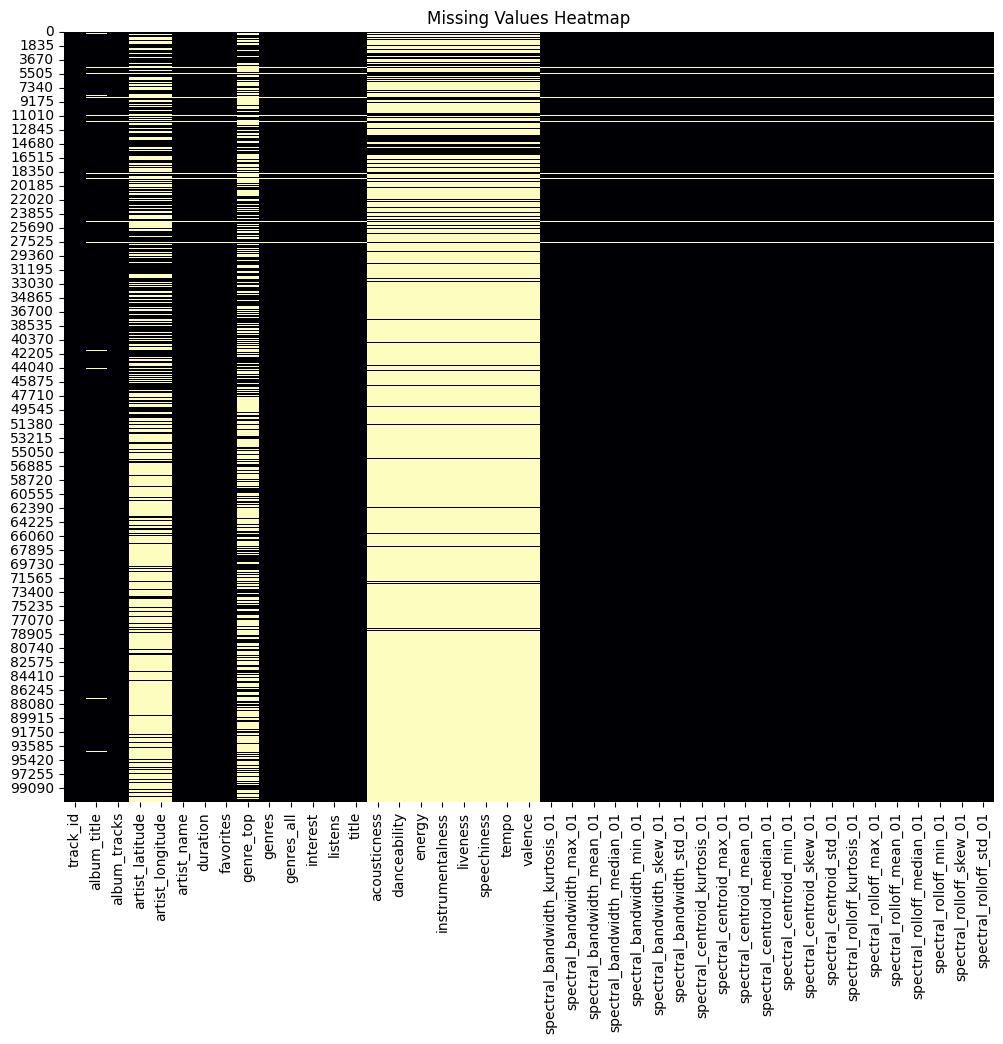

In [75]:
plt.figure(figsize=(12,10))
sns.heatmap(tracks_echonest_spectral.isna(), cbar=False, cmap='magma')
plt.title("Missing Values Heatmap")
plt.show()

In [76]:
# Setting our threshold
threshold = 0.6

# Identifying columns we want to drop
drop_cols = tracks_echonest_spectral.columns[tracks_echonest_spectral.isnull().sum() / len(tracks_echonest_spectral) > threshold]

print(f"Number of  with >{threshold*100}% missing data:")
print(len(drop_cols))

# Cleaning our merged dataset
tracks_echonest_spectral_2 = tracks_echonest_spectral.drop(columns=drop_cols)

print(f"New df6 shape after re-dropping rows: {tracks_echonest_spectral_2.shape}")
display(tracks_echonest_spectral_2.head())

Number of  with >60.0% missing data:
10
New df6 shape after re-dropping rows: (100882, 33)


,track_id,album_title,album_tracks,artist_name,duration,favorites,genre_top,genres,genres_all,interest,...,spectral_centroid_min_01,spectral_centroid_skew_01,spectral_centroid_std_01,spectral_rolloff_kurtosis_01,spectral_rolloff_max_01,spectral_rolloff_mean_01,spectral_rolloff_median_01,spectral_rolloff_min_01,spectral_rolloff_skew_01,spectral_rolloff_std_01
0,11870,Wildahead Portibeast,10.0,Wildahead Portibeast,131.0,0.0,Hip-Hop,[21],[21],733.0,...,327.569489,2.080017,575.112488,2.839292,8968.579102,2338.119629,1981.054688,516.796875,1.812383,1234.268433
1,11871,Wildahead Portibeast,10.0,Wildahead Portibeast,185.0,0.0,Hip-Hop,[21],[21],753.0,...,187.277390,1.886271,655.114319,2.036670,9560.742188,2132.796143,1830.322266,226.098633,1.412759,1387.095459
2,11872,Wildahead Portibeast,10.0,Wildahead Portibeast,183.0,0.0,Hip-Hop,[21],[21],744.0,...,99.604340,1.492531,645.915894,-0.463741,9345.410156,2760.100342,2583.984375,64.599609,0.245426,1420.888672
3,11873,Wildahead Portibeast,10.0,Wildahead Portibeast,213.0,3.0,Hip-Hop,[21],[21],936.0,...,203.401001,0.916191,615.655090,-0.114326,9722.241211,2445.449219,2271.752930,86.132812,0.581035,1330.056030
4,11874,Wildahead Portibeast,10.0,Wildahead Portibeast,162.0,0.0,Hip-Hop,[21],[21],861.0,...,244.832825,2.521557,755.226440,4.567743,10142.138672,2265.638672,1905.688477,215.332031,1.849876,1474.148682


We drop the rows with any missing values.

In [77]:
tracks_echonest_spectral_2.dropna(inplace=True)

In [78]:
tracks_echonest_spectral_2.isna().sum(axis=0).sum()

np.int64(0)

There are no more missing values.

We also check if there is any duplicates or infinite values.

In [79]:
print(f"Number of duplicates : {tracks_echonest_spectral_2.duplicated().sum()}")

inf_count = np.isinf(tracks_echonest_spectral_2.select_dtypes(include='number')).sum()
print(f"Number of infinite values per column :\n{inf_count}")


Number of duplicates : 0
Number of infinite values per column :
track_id                          0
album_tracks                      0
duration                          0
favorites                         0
interest                          0
listens                           0
spectral_bandwidth_kurtosis_01    0
spectral_bandwidth_max_01         0
spectral_bandwidth_mean_01        0
spectral_bandwidth_median_01      0
spectral_bandwidth_min_01         0
spectral_bandwidth_skew_01        0
spectral_bandwidth_std_01         0
spectral_centroid_kurtosis_01     0
spectral_centroid_max_01          0
spectral_centroid_mean_01         0
spectral_centroid_median_01       0
spectral_centroid_min_01          0
spectral_centroid_skew_01         0
spectral_centroid_std_01          0
spectral_rolloff_kurtosis_01      0
spectral_rolloff_max_01           0
spectral_rolloff_mean_01          0
spectral_rolloff_median_01        0
spectral_rolloff_min_01           0
spectral_rolloff_skew_01          0


### Step 3: Variable recoding and Transformation

Now that we have cleaned our merged dataset, the next step will be to try using "genres" column to discard "genres_all".

Firstly, we use genre_id and genre_title, from the genre dataset we were not able to merge, to create a dictionnary. Each id will correspond to a genre title.

This will allow us to encode the genres columns.

In [80]:
id_to_title = dict(zip(genres["genre_id"], genres["genre_title"]))
display(id_to_title)

{1: 'Avant-Garde',
 2: 'International',
 3: 'Blues',
 4: 'Jazz',
 5: 'Classical',
 6: 'Novelty',
 7: 'Comedy',
 8: 'Old-Time / Historic',
 9: 'Country',
 10: 'Pop',
 11: 'Disco',
 12: 'Rock',
 13: 'Easy Listening',
 14: 'Soul-RnB',
 15: 'Electronic',
 16: 'Sound Effects',
 17: 'Folk',
 18: 'Soundtrack',
 19: 'Funk',
 20: 'Spoken',
 21: 'Hip-Hop',
 22: 'Audio Collage',
 25: 'Punk',
 26: 'Post-Rock',
 27: 'Lo-Fi',
 30: 'Field Recordings',
 31: 'Metal',
 32: 'Noise',
 33: 'Psych-Folk',
 36: 'Krautrock',
 37: 'Jazz: Vocal',
 38: 'Experimental',
 41: 'Electroacoustic',
 42: 'Ambient Electronic',
 43: 'Radio Art',
 45: 'Loud-Rock',
 46: 'Latin America',
 47: 'Drone',
 49: 'Free-Folk',
 53: 'Noise-Rock',
 58: 'Psych-Rock',
 63: 'Bluegrass',
 64: 'Electro-Punk',
 65: 'Radio',
 66: 'Indie-Rock',
 70: 'Industrial',
 71: 'No Wave',
 74: 'Free-Jazz',
 76: 'Experimental Pop',
 77: 'French',
 79: 'Reggae - Dub',
 81: 'Afrobeat',
 83: 'Nerdcore',
 85: 'Garage',
 86: 'Indian',
 88: 'New Wave',
 89: 'P

Now we can use this dictionnary to identify each number of the columns genres of tracks_echonest_spectral_2 with a genre titles.

In [81]:
tracks_echonest_spectral_2['genres_titles'] = tracks_echonest_spectral_2['genres'].apply(lambda x: [id_to_title[int(i)] for i in ast.literal_eval(x)])
display(tracks_echonest_spectral_2['genres_titles'])

,genres_titles
0,[Hip-Hop]
1,[Hip-Hop]
2,[Hip-Hop]
3,[Hip-Hop]
4,[Hip-Hop]
...,...
100876,[Punk]
100877,[Punk]
100878,[Punk]
100879,[Punk]


We now want to retrieve the parent of each cell in the genres column using genres_all. Indeed, the genre column consists of a list of different genres, and we want to obtain the parent of each one. We use the genre_all column because it contains the parent.

To do this, we create a to_set function that will take a cell (value) as input and convert it into an appropriate format in order to then be able to calculate the symmetric difference.

In [82]:
def to_set(cell):
    # Handle NaN, already-list, or stringified list
    if pd.isna(cell):
        return set()
    if isinstance(cell, str):
        cell = ast.literal_eval(cell)
    return set(cell)

s1 = tracks_echonest_spectral_2['genres'].apply(to_set)
s2 = tracks_echonest_spectral_2['genres_all'].apply(to_set)

# Symmetric difference (elements present in exactly one of the sets)
tracks_echonest_spectral_2['parent_genres'] = s1.combine(s2, lambda a, b: a.symmetric_difference(b))
print(f"Parent identified :\n {tracks_echonest_spectral_2['parent_genres']}")

Parent identified :
 0           {}
1           {}
2           {}
3           {}
4           {}
          ... 
100876    {12}
100877    {12}
100878    {12}
100879    {12}
100880    {12}
Name: parent_genres, Length: 44352, dtype: object


Now we want to treat genre_top, which we need to encode. To do so, we use the library sentence transformer to convert genre_top in numerical vectors called embeddings.

We use pre_trained transformator all-MiniLM-L6-v2 which is specifically conceived to generate embeddings of sentences.

In [83]:
# # Initializing model
# model = SentenceTransformer('all-MiniLM-L6-v2')

# # Applying the model to the column genre_top
# tracks_echonest_spectral_2['genre_top_embedded'] = (
#     model.encode(
#         tracks_echonest_spectral_2['genre_top'].apply(lambda x: x + ' music').tolist(),
#         show_progress_bar=True
#     )
#     .tolist()
# )

In [84]:
tracks_echonest_spectral_2.head()

,track_id,album_title,album_tracks,artist_name,duration,favorites,genre_top,genres,genres_all,interest,...,spectral_centroid_std_01,spectral_rolloff_kurtosis_01,spectral_rolloff_max_01,spectral_rolloff_mean_01,spectral_rolloff_median_01,spectral_rolloff_min_01,spectral_rolloff_skew_01,spectral_rolloff_std_01,genres_titles,parent_genres
0,11870,Wildahead Portibeast,10.0,Wildahead Portibeast,131.0,0.0,Hip-Hop,[21],[21],733.0,...,575.112488,2.839292,8968.579102,2338.119629,1981.054688,516.796875,1.812383,1234.268433,[Hip-Hop],{}
1,11871,Wildahead Portibeast,10.0,Wildahead Portibeast,185.0,0.0,Hip-Hop,[21],[21],753.0,...,655.114319,2.036670,9560.742188,2132.796143,1830.322266,226.098633,1.412759,1387.095459,[Hip-Hop],{}
2,11872,Wildahead Portibeast,10.0,Wildahead Portibeast,183.0,0.0,Hip-Hop,[21],[21],744.0,...,645.915894,-0.463741,9345.410156,2760.100342,2583.984375,64.599609,0.245426,1420.888672,[Hip-Hop],{}
3,11873,Wildahead Portibeast,10.0,Wildahead Portibeast,213.0,3.0,Hip-Hop,[21],[21],936.0,...,615.655090,-0.114326,9722.241211,2445.449219,2271.752930,86.132812,0.581035,1330.056030,[Hip-Hop],{}
4,11874,Wildahead Portibeast,10.0,Wildahead Portibeast,162.0,0.0,Hip-Hop,[21],[21],861.0,...,755.226440,4.567743,10142.138672,2265.638672,1905.688477,215.332031,1.849876,1474.148682,[Hip-Hop],{}


Nevertheless, genre_top_embedded will not be used because of data leakage. Still, it was interesting to explore how we could use these informations.

## **Phase 2 : Construction of prediction models**

 - Task 1 : We want to predict the original genre, genre_top

Before building prediction models, we need to remove certain columns from our dataset that we consider irrelevant or at risk of leakage, namely: album_tracks, album_title, artist_name, track_id, genres, parent_genres, genres_titles, favorites, genres_all, title, genre_top_embedded.

In [85]:
df_prediction = tracks_echonest_spectral_2.drop(columns=["album_tracks","album_title","artist_name","track_id","genres","parent_genres","genres_titles","favorites","genres_all","title"])

In [86]:
df_prediction.head()

,duration,genre_top,interest,listens,spectral_bandwidth_kurtosis_01,spectral_bandwidth_max_01,spectral_bandwidth_mean_01,spectral_bandwidth_median_01,spectral_bandwidth_min_01,spectral_bandwidth_skew_01,...,spectral_centroid_min_01,spectral_centroid_skew_01,spectral_centroid_std_01,spectral_rolloff_kurtosis_01,spectral_rolloff_max_01,spectral_rolloff_mean_01,spectral_rolloff_median_01,spectral_rolloff_min_01,spectral_rolloff_skew_01,spectral_rolloff_std_01
0,131.0,Hip-Hop,733.0,218.0,1.386746,3632.703369,1373.206787,1240.352661,519.210815,1.255615,...,327.569489,2.080017,575.112488,2.839292,8968.579102,2338.119629,1981.054688,516.796875,1.812383,1234.268433
1,185.0,Hip-Hop,753.0,267.0,0.988129,3607.125000,1422.162231,1373.406982,367.892883,0.769592,...,187.277390,1.886271,655.114319,2.036670,9560.742188,2132.796143,1830.322266,226.098633,1.412759,1387.095459
2,183.0,Hip-Hop,744.0,223.0,-0.288111,3509.530273,1639.155884,1663.023804,397.353760,0.066965,...,99.604340,1.492531,645.915894,-0.463741,9345.410156,2760.100342,2583.984375,64.599609,0.245426,1420.888672
3,213.0,Hip-Hop,936.0,245.0,0.013341,3748.871338,1424.273682,1366.631958,454.320618,0.568272,...,203.401001,0.916191,615.655090,-0.114326,9722.241211,2445.449219,2271.752930,86.132812,0.581035,1330.056030
4,162.0,Hip-Hop,861.0,192.0,2.176594,4069.634522,1402.951172,1350.756836,427.842957,1.069853,...,244.832825,2.521557,755.226440,4.567743,10142.138672,2265.638672,1905.688477,215.332031,1.849876,1474.148682


We can then define X and y (the target) and encode y before training our model.

In [87]:
X = df_prediction.drop(columns=['genre_top'])
# Target : genre_top
y = df_prediction['genre_top']

# Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

We use a Pipeline to prevent data leakage and ensure reproducibility. We also use a scaler to standardise our data. Indeed, we use the logistic regression to classify (algorithm based on gradient descent optimization), which may be sensitive to the scale of the data.

In [88]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', LogisticRegression(
        max_iter=2000,
        solver='lbfgs'
    ))
])

In [89]:
param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'clf__C': [0.1, 1, 10]
}

We apply a stratified cross validation using 5 folds, then we evaluate the scoring regarding the accuracy of each of the fold.

In [90]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

In [91]:
grid_search.fit(X, y_encoded)
print("GridSearchCV fitting complete.")

GridSearchCV fitting complete.


In [92]:
# Cross validation stratified
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_encoded, cv=skf, scoring='accuracy')

In [93]:
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())
print("Std deviation:", scores.std())

Cross-validated accuracy scores: [0.47548191 0.48619096 0.4794814  0.48444194 0.47418264]
Mean accuracy: 0.47995576836828313
Std deviation: 0.004744951566821075


In [94]:
grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'clf__C': 10, 'pca__n_components': 20}
0.46667559077073273


### Evaluation avec XGBoost

In [95]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier(
        objective='multi:softmax',
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    ))
])

# Définir la grille de paramètres pour XGBoost
xgb_param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__max_depth': [3, 5, 7]
}

print("XGBoost pipeline and parameter grid defined.")

XGBoost pipeline and parameter grid defined.


In [96]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("GridSearchCV for XGBoost initialized.")

GridSearchCV for XGBoost initialized.


In [97]:
xgb_grid_search.fit(X, y_encoded) # Using X and y_encoded from previous steps
print("GridSearchCV for XGBoost fitting complete.")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

In [98]:
print("Best parameters found for XGBoost: ", xgb_grid_search.best_params_)
print("Best accuracy score for XGBoost: ", xgb_grid_search.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

Mean Logistic Regression with lbfgs solver: **0.48** of accuracy without pca and 0.51 with pca.

It's not bad, but it's not great either.

We can try another classification model : K-Nearest-Neighbors and define hyperparameters to optimize performances.

In [100]:
# K-Nearest-Neighbors
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# Hyperparameters
param_grid = {
    'clf__n_neighbors': [3, 5, 7, 11],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan']
}

We use GridSearchCV to systematically explore all possible combinations of hyperparameters specified.

In [101]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parameters optimization
grid_2 = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

In [ ]:
grid_2.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

With kNN : **0.51** accuracy.

A little bit better.

## Dealing with Missing Data 2 : filling genre_top and removing missing rows, the goal is to keep valence, intrumentalness ...

In [ ]:
genres

We identify and collect the identifiers of all genders considered to be ‘parent genders’ or higher-level genders.

In [ ]:
parent_genres = set(genres["genre_id"][genres["genre_parent_id"].isna()].tolist())
display(parent_genres)

We are going to remove rows where genres_all is NaN, and where it's a empty list

In [ ]:
tracks_echonest_spectral = tracks_echonest_spectral.dropna(subset=['genres_all'])


In [ ]:
tracks_echonest_spectral[tracks_echonest_spectral["genres_all"].apply(lambda x: len(ast.literal_eval(x))== 0)]["genres_all"].count()

In [ ]:
tracks_echonest_spectral = tracks_echonest_spectral[~tracks_echonest_spectral["genres_all"].apply(lambda x: len(ast.literal_eval(x)) == 0)]

Using 'parent_genres', We create a new column containing the parent.

In [ ]:
tracks_echonest_spectral["top_genres"] = tracks_echonest_spectral["genres_all"].apply(lambda x: set(ast.literal_eval(x)).intersection(parent_genres))
tracks_echonest_spectral["top_genres"]

This allows you to see which genres are ‘original’ for these tracks that have not been mapped to a parent genre.

In [ ]:
tracks_echonest_spectral[tracks_echonest_spectral["top_genres"].apply(len)== 0]["genres_all"]

A valid approach would be to track each parent of these genres in "genres_all", but because its only 800 rows, the easier approach is to delete them.

In [ ]:
tracks_echonest_spectral = tracks_echonest_spectral[tracks_echonest_spectral["top_genres"].apply(len) > 0]

In [ ]:
tracks_echonest_spectral["top_genre_title"] = tracks_echonest_spectral["top_genres"].apply(lambda x: id_to_title[random.choice(list(x))])
tracks_echonest_spectral["top_genre_title"]

Re-evaluate the supervised learning models for predicting the genre_top of a track.

This re-evaluation should filtered the merged dataset to include only rows where valence and instrumentalness are not missing.

In [ ]:
tracks_echonest_spectral_filtered = tracks_echonest_spectral.dropna(subset=['valence', 'instrumentalness', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'tempo'])
print(f"Shape of dataframe after filtering : {tracks_echonest_spectral_filtered.shape}")
display(tracks_echonest_spectral_filtered.head())

In [ ]:
tracks_echonest_spectral_filtered.isna().sum()

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(tracks_echonest_spectral_filtered.isna(), cbar=False, cmap='magma')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
tracks_echonest_spectral_filtered.dropna(inplace=True)
tracks_echonest_spectral_filtered.drop(columns=['artist_longitude', 'artist_latitude'])

In [ ]:
tracks_echonest_spectral_filtered.isna().sum().sum()

In [ ]:
tracks_echonest_spectral_filtered.shape

In [ ]:
tracks_echonest_spectral_filtered_2 = tracks_echonest_spectral_2.drop(columns=["album_tracks","album_title","artist_name","track_id","genres","parent_genres","genres_titles","favorites","genres_all","title", "genre_top_embedded"])

In [ ]:
tracks_echonest_spectral_filtered_2.info()

In [ ]:
le = LabelEncoder()
tracks_echonest_spectral_filtered_2['genre_top'] = le.fit_transform(tracks_echonest_spectral_filtered_2['genre_top'])

In [ ]:
tracks_echonest_spectral_filtered_2

In [ ]:
corr_matrix = tracks_echonest_spectral_filtered_2.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Spotify Features")
plt.show()

In [ ]:
X_2 = tracks_echonest_spectral_filtered_2.drop(columns=['genre_top'])
# Target : genre_top
y_2 = tracks_echonest_spectral_filtered_2['genre_top']

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        max_iter=2000,
        solver='lbfgs'
    ))
])

In [ ]:
# Cross validation stratified
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_2, y_2, cv=skf, scoring='accuracy')

In [ ]:
print("Cross-validated accuracy scores:", scores)
print("Mean accuracy:", scores.mean())
print("Std deviation:", scores.std())

We can try to add PCA to the Logistic Regression pipeline and perform a GridSearchCV to find the optimal n_components for PCA and C for Logistic Regression, then print the best parameters and the best accuracy score obtained.

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('clf', LogisticRegression(
        max_iter=2000,
        solver='lbfgs'
    ))
])

We need to define the hyperparameter search space for GridSearchCV, including  n_components for PCA and C for Logistic Regression. This dictionary will be used by GridSearchCV to explore different combinations of these parameters.



In [ ]:
param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'clf__C': [0.1, 1, 10]
}

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_2, y_2)
print("GridSearchCV fitting complete.")

The best parameters and the best score achieved are stored in the best_params_ and best_score_ attributes of the grid_search object, respectively.



In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

### Summary of Logistic Regression with PCA

After applying GridSearchCV to the Logistic Regression pipeline augmented with PCA, the optimal hyperparameters and the best performance achieved are as follows:

- Optimal n_components for PCA: 0.95 (meaning PCA retains 95% of the variance).
- Optimal C for Logistic Regression: 10.
- Best Accuracy Score: 0.43.